In [1]:
import bilby
import matplotlib.pyplot as plt
import numpy as np
from bilby.core.utils import random
from gwpy.timeseries import TimeSeries

# Sets seed of bilby's generator "rng" to "123" to ensure reproducibility
random.seed(123)

/Users/ved/miniforge3/envs/neutron/lib/python3.12/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


10:03 bilby INFO    : Running for label 'sinusoidal', output will be saved to 'outdir_ex1'
10:03 bilby INFO    : Analysis priors:
10:03 bilby INFO    : A=Uniform(minimum=-10, maximum=10, name='A', latex_label='A', unit=None, boundary=None)
10:03 bilby INFO    : f=Uniform(minimum=0, maximum=1, name='f', latex_label='f', unit=None, boundary=None)
10:03 bilby INFO    : phi=Uniform(minimum=-10, maximum=10, name='phi', latex_label='phi', unit=None, boundary=None)
10:03 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLikelihood'>
10:03 bilby INFO    : Analysis likelihood noise evidence: nan
10:03 bilby INFO    : Single likelihood evaluation took 2.909e-05 s
10:03 bilby WARNING : Supplied argument 'overwrite' not an argument of 'Dynesty', removing.
10:03 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future rel

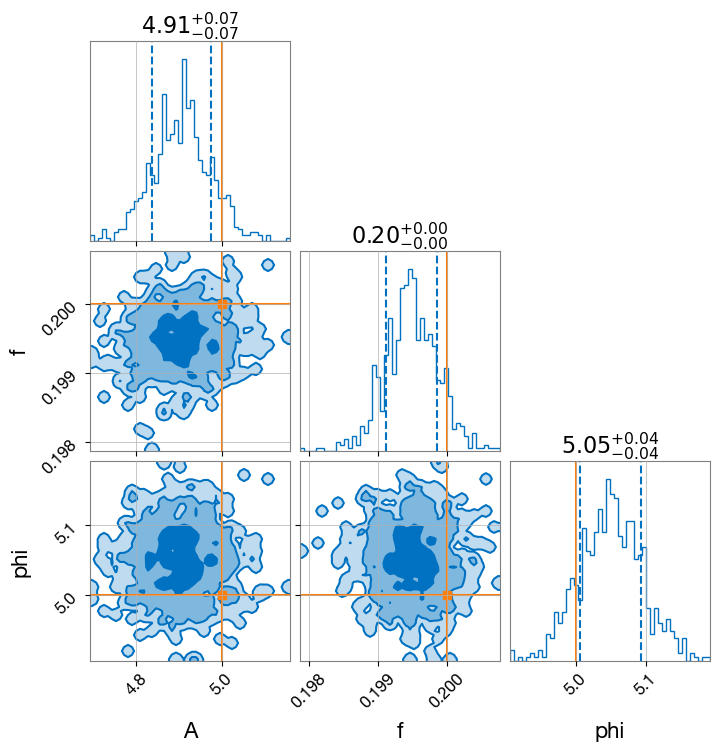

In [2]:

# Exercise 1

# Setup
outdir_ex1 = "outdir_ex1"
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir_ex1)
label_ex1 = "sinusoidal"

# Domain setup
sampling_frequency_ex1 = 10
time_duration_ex1 = 10
time_ex1 = np.arange(0, time_duration_ex1, 1/sampling_frequency_ex1)
N_ex1 = len(time_ex1)
sigma_ex1 = random.rng.normal(0.5, 0.01, N_ex1)

def model_ex1(time, A, f, phi):
    return A*np.sin(2*np.pi*f*time) + phi

injection_params_ex1 = dict(A=5, f=0.2, phi = 5)
data_ex1 = model_ex1(time_ex1, **injection_params_ex1) + random.rng.normal(0, sigma_ex1, N_ex1)

# Likelihood
likelihood_ex1 = bilby.likelihood.GaussianLikelihood(time_ex1, data_ex1, model_ex1, sigma_ex1)

# Priors
priors_ex1 = {}
priors_ex1["A"] = bilby.core.prior.Uniform(-10, 10, "A")
priors_ex1["f"] = bilby.core.prior.Uniform(0, 1, "f")
priors_ex1["phi"] = bilby.core.prior.Uniform(-10, 10, "phi")

# Run Sampler
result_ex1 = bilby.run_sampler(
    likelihood=likelihood_ex1,
    priors=priors_ex1,
    sampler="dynesty",
    npoints=250,
    injection_parameters=injection_params_ex1,
    outdir=outdir_ex1,
    label=label_ex1,
    overwrite=True
)

result_ex1.plot_corner()


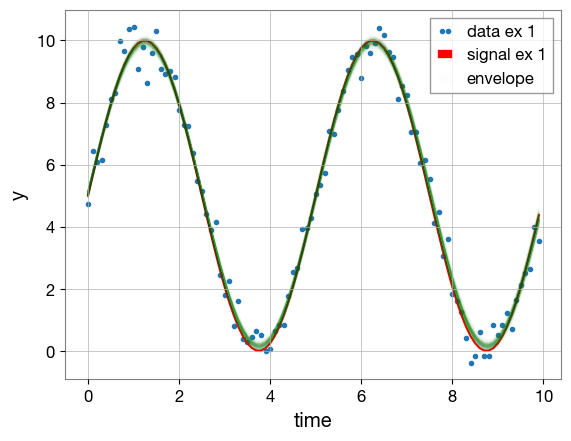

In [3]:
fig, ax = plt.subplots()
ax.plot(time_ex1, data_ex1, ".", label="data ex 1")
ax.plot(time_ex1, model_ex1(time_ex1, **injection_params_ex1), "r", label="signal ex 1")

for j,i in enumerate(np.random.choice(len(result_ex1.posterior), 200, replace=False)):
    sample = result_ex1.posterior.iloc[i]
    y_pred = model_ex1(time_ex1, sample.A, sample.f, sample.phi)
    ax.plot(time_ex1, y_pred, color='C2', alpha=0.01, label="envelope" if j==0 else None)

ax.set_xlabel("time")
ax.set_ylabel("y")
ax.legend()

# fig.savefig("{}/{}_data_ex1.png".format(outdir, label))

10:03 bilby INFO    : Running for label 'damped_sinusoidal', output will be saved to 'outdir_ex2'
10:03 bilby INFO    : Analysis priors:
10:03 bilby INFO    : A=Uniform(minimum=-10, maximum=10, name='A', latex_label='A', unit=None, boundary=None)
10:03 bilby INFO    : f=Uniform(minimum=0, maximum=1, name='f', latex_label='f', unit=None, boundary=None)
10:03 bilby INFO    : phi=Uniform(minimum=-10, maximum=10, name='phi', latex_label='phi', unit=None, boundary=None)
10:03 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLikelihood'>
10:03 bilby INFO    : Analysis likelihood noise evidence: nan
10:03 bilby INFO    : Single likelihood evaluation took 3.814e-05 s
10:03 bilby WARNING : Supplied argument 'overwrite' not an argument of 'Dynesty', removing.
10:03 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a fut

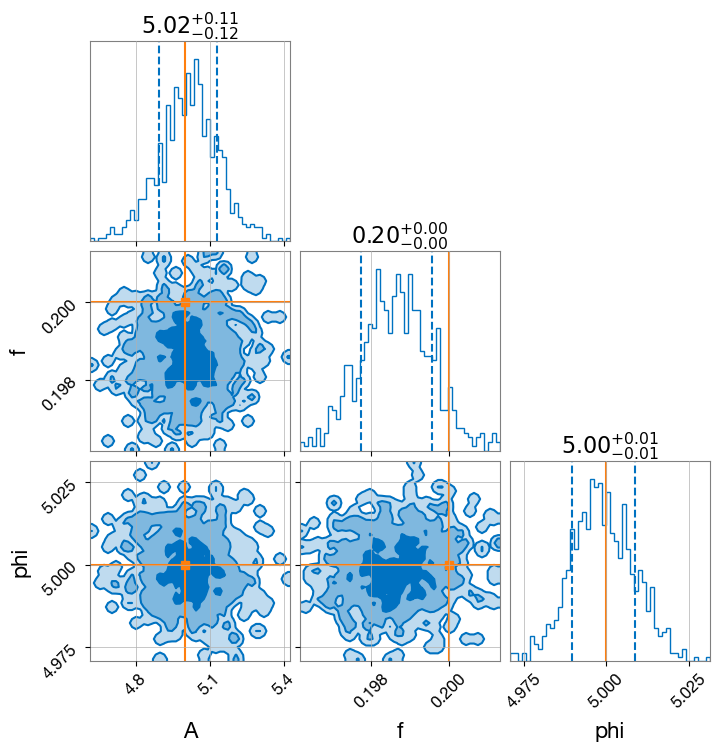

In [4]:
# Exercise 2
outdir_ex2 = "outdir_ex2"
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir_ex2)
label_ex2 = "damped_sinusoidal"

# Domain setup
sampling_frequency_ex2 = 10
time_duration_ex2 = 10
time_ex2 = np.arange(5 + 0, 5 + time_duration_ex2, 1/sampling_frequency_ex2)
N_ex2 = len(time_ex2)
sigma_ex2 = random.rng.normal(0.1, 0.01, N_ex2)

def model_ex2(time, A, f, phi):
    return (A / time)*np.sin(2*np.pi*f*time) + phi

injection_params_ex2 = dict(A=5, f=0.2, phi = 5)
data_ex2 = model_ex2(time_ex2, **injection_params_ex2) + random.rng.normal(0, sigma_ex2, N_ex2)

# Likelihood
likelihood_ex2 = bilby.likelihood.GaussianLikelihood(time_ex2, data_ex2, model_ex2, sigma_ex2)

# Priors
priors_ex2 = {}
priors_ex2["A"] = bilby.core.prior.Uniform(-10, 10, "A")
priors_ex2["f"] = bilby.core.prior.Uniform(0, 1, "f")
priors_ex2["phi"] = bilby.core.prior.Uniform(-10, 10, "phi")

# Run Sampler
result_ex2 = bilby.run_sampler(
    likelihood=likelihood_ex2,
    priors=priors_ex2,
    sampler="dynesty",
    npoints=250,
    injection_parameters=injection_params_ex2,
    outdir=outdir_ex2,
    label=label_ex2,
    overwrite=True
    
)

result_ex2.plot_corner()

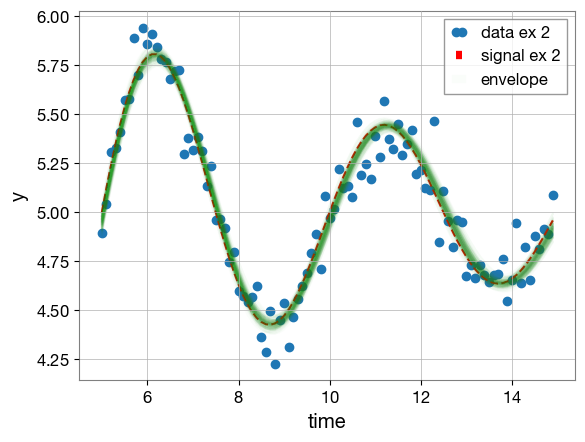

In [5]:
fig, ax = plt.subplots()
ax.plot(time_ex2, data_ex2, "o", label="data ex 2")
ax.plot(time_ex2, model_ex2(time_ex2, **injection_params_ex2), "--r", label="signal ex 2")

for j,i in enumerate(np.random.choice(len(result_ex2.posterior), 200, replace=False)):
    sample = result_ex2.posterior.iloc[i]
    y_pred = model_ex2(time_ex2, sample.A, sample.f, sample.phi)
    ax.plot(time_ex2, y_pred, color='C2', alpha=0.02, label = "envelope" if j==0 else None)

ax.set_xlabel("time")
ax.set_ylabel("y")
ax.legend()



# fig.savefig("{}/{}_data_ex2.png".format(outdir, label_ex2))

10:03 bilby INFO    : Running for label 'damped_sinusoidal_whitened_ex3', output will be saved to 'outdir_ex3'
10:03 bilby INFO    : Analysis priors:
10:03 bilby INFO    : A=Uniform(minimum=-5e-18, maximum=5e-18, name='A', latex_label='A', unit=None, boundary=None)
10:03 bilby INFO    : f=Uniform(minimum=10, maximum=100, name='f', latex_label='f', unit=None, boundary=None)
10:03 bilby INFO    : phi=Uniform(minimum=-5e-18, maximum=5e-18, name='phi', latex_label='phi', unit=None, boundary=None)
10:03 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLikelihood'>
10:03 bilby INFO    : Analysis likelihood noise evidence: nan
10:03 bilby INFO    : Single likelihood evaluation took 1.984e-04 s
10:03 bilby WARNING : Supplied argument 'overwrite' not an argument of 'Dynesty', removing.
10:03 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behavi

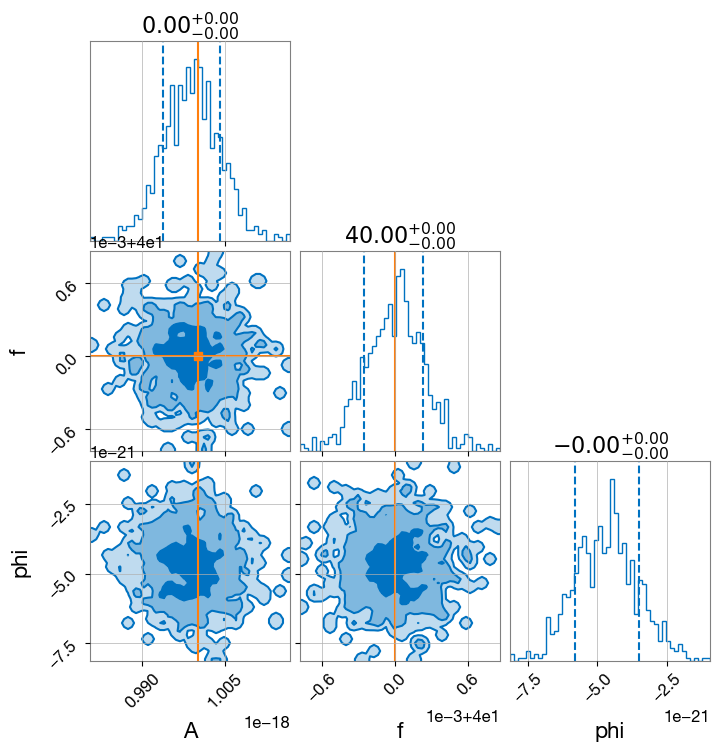

In [6]:
# Exercise 3

outdir_ex3 = "outdir_ex3"
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir_ex3)
label_ex3 = "damped_sinusoidal_whitened_ex3"

sampling_frequency_ex3 = 4096   # native GW strain sampling frequency [Hz]
time_duration_ex3 = 10          
time_ex3 = np.arange(1, 1 + time_duration_ex3, 1/sampling_frequency_ex3)
N_ex3 = len(time_ex3)

def model_ex3(time, A, f, phi):
    return (A / time) * np.sin(2 * np.pi * f * time) + phi

injection_params_ex3 = dict(A=1e-18, f=40, phi=0)  # f in Hz

# 10s stretch of Hanford data before GW150914 (which was at ~126259462)
strain = TimeSeries.fetch_open_data('H1', 1126259450, 1126259460, sample_rate=4096)
noise_strain = strain.value[:N_ex3]

data_ex3 = model_ex3(time_ex3, **injection_params_ex3) + noise_strain


likelihood_ex3 = bilby.likelihood.GaussianLikelihood(time_ex3, data_ex3, model_ex3, sigma=np.std(noise_strain))

priors_ex3 = dict(
    A=bilby.core.prior.Uniform(-5e-18, 5e-18, "A"),
    f=bilby.core.prior.Uniform(10, 100, "f"),
    phi=bilby.core.prior.Uniform(-5e-18, 5e-18, "phi"),
)

# --- Run sampler ---
result_ex3 = bilby.run_sampler(
    likelihood=likelihood_ex3,
    priors=priors_ex3,
    sampler="dynesty",
    npoints=250,
    injection_parameters=injection_params_ex3,
    outdir=outdir_ex3,
    label=label_ex3,
    overwrite=True,
)

result_ex3.plot_corner()


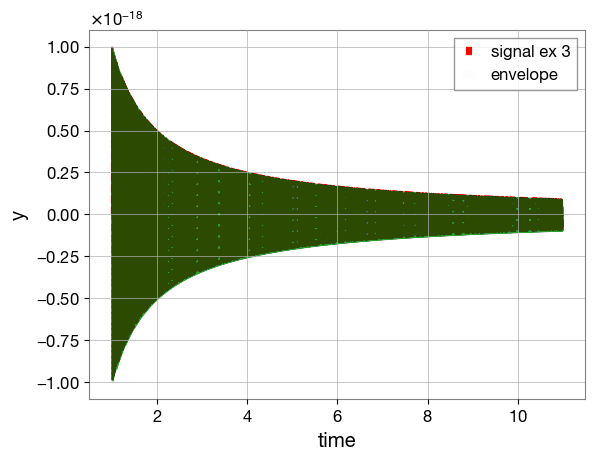

In [7]:
fig, ax = plt.subplots()
# ax.plot(time_ex3, data_ex3, ".", label="data ex 3")
ax.plot(time_ex3, model_ex3(time_ex3, **injection_params_ex3), "--r", label="signal ex 3")

for j,i in enumerate(np.random.choice(len(result_ex3.posterior), 200, replace=False)):
    sample = result_ex3.posterior.iloc[i]
    y_pred = model_ex3(time_ex3, sample.A, sample.f, sample.phi)
    ax.plot(time_ex3, y_pred, color='C2', alpha=0.01, label = "envelope" if j==0 else None)

ax.set_xlabel("time")
ax.set_ylabel("y")
ax.legend()

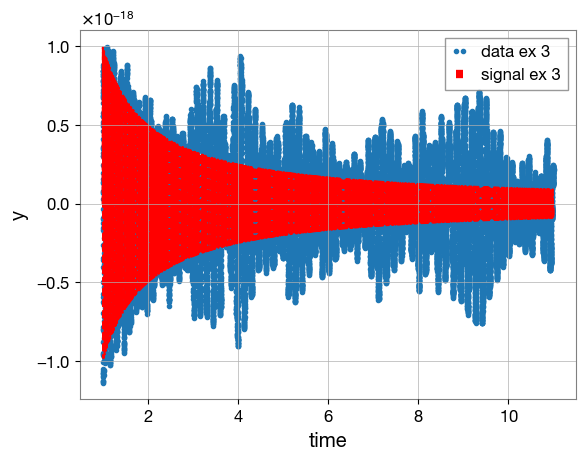

In [8]:
fig, ax = plt.subplots()
ax.plot(time_ex3, data_ex3, ".", label="data ex 3")
ax.plot(time_ex3, model_ex3(time_ex3, **injection_params_ex3), "--r", label="signal ex 3")

# for j,i in enumerate(np.random.choice(len(result_ex3.posterior), 200, replace=False)):
#     sample = result_ex3.posterior.iloc[i]
#     y_pred = model_ex3(time_ex3, sample.A, sample.f, sample.phi)
#     ax.plot(time_ex3, y_pred, color='C2', alpha=0.01, label = "envelope" if j==0 else None)

ax.set_xlabel("time")
ax.set_ylabel("y")
ax.legend()